In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize'] = (8,8)

In [3]:
def ground_truth(x,y):
    return (1.3*x-.5)*(1.3*x-.5) + (y-.5)*(y-.5) < .05

def createSamples(N, xl, xr, yu, yo, ground_truth):
    """
        ground_truth is a function that calculates the "true" label, given coordinates x and y
        Produce N samples in the rectangle [xl, xr, yu, yo] with the given ground_truth
    """
    np.random.seed(1234)
    x = np.random.uniform(xl,xr,N)
    y = np.random.uniform(yu,yo,N)
    c = ground_truth(x, y) * 1.0
    return x, y, c

In [4]:
# You may want to rerun and should close the session, if one is open.
try: 
    sess.close()
except NameError:
    print("Don't worry. Need to ignore this error once")
sess = tf.InteractiveSession()
FLAGS=lambda: None

Don't worry. Need to ignore this error once


## The 2-dimensional input data, classes are represented by colors

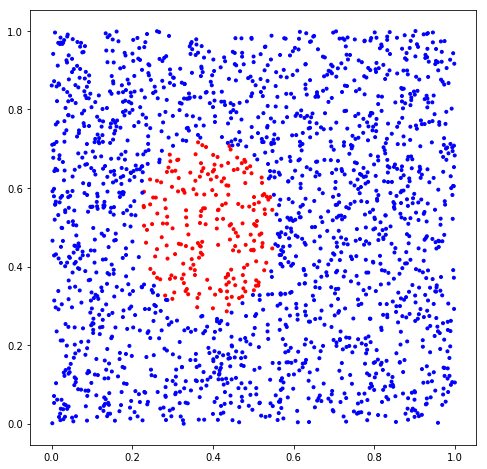

In [5]:
N=2000
sx, sy, labels = createSamples(N, 0, 1, 0, 1, ground_truth)
points=np.array([sx, sy])
plt.scatter(sx, sy, c=labels, cmap="bwr", marker='.')

### The Neural Network

![NN](images/NN_2x3x3x2.png)
Our simple neural network will be defined as

$$ f(x) = \Theta^{(3)} \cdot \sigma(\Theta^{(2)} \cdot \sigma(\Theta^{(1)} \cdot x + b^{(1)} ) + b^{(2)}) + b^{(3)}$$

Note, that we omit the final non-linearity at this point. That's for mere technical reasons and doesn't change the story.

Below you see the neural network in code, featuring some illustrative initial values.

You see: We have 2 input nodes, 3 nodes in each of the hidden layers and again 2 nodes in the output layer

In [6]:
#### Weight matrices and biases initialized to some values

In [7]:
Theta1 = np.array([[1.6, 4], [1.6, -1.2], [-3.6, 1.6]])                  # 3x2 weight Matrix towards the first hidden layer
b1 = np.array([[-1, 1, 6]]).T                                        # bias of the first hidden layer
Theta2 = np.array([[1, 2, -3], [.5, .2, -3], [2, 1, -.2]])    # 3x3 weight Matrix towards the second hidden layer
b2 = np.array([[.2, .1, -.4]]).T                                     # bias of the 2nd hidden layer
Theta3 = np.array([[.5, 2, -.03], [.2, 1, -.2]])                     # 2x3 weight Matrix towards the output layer
b3 = np.array([[.2, .3]]).T                                          # bias of the output layer

In [8]:
#
# NOTE: You need to initialize with the transpose of the weight matrix, otherwise TF mixes up columns and rows
#       Of course that's not a problem, since typically, all numbers are randomly initialized, anyway.
# (can you imagine the frustration until I found out?)
#
W1_i=tf.constant_initializer(Theta1.T)
b1_i=tf.constant_initializer(b1)
W2_i=tf.constant_initializer(Theta2.T)
b2_i=tf.constant_initializer(b2)
W3_i=tf.constant_initializer(Theta3.T)
b3_i=tf.constant_initializer(b3)

def feed_forward(x):
    _dense1=tf.layers.Dense(3, activation=tf.nn.sigmoid, kernel_initializer=W1_i, bias_initializer=b1_i)
    _dense2=tf.layers.Dense(3, activation=tf.nn.sigmoid, kernel_initializer=W2_i, bias_initializer=b2_i)
    _logits=tf.layers.Dense(2, kernel_initializer=W3_i, bias_initializer=b3_i)    

    y = _dense1(x)
    y = _dense2(y)
    y = _logits(y)
    return y

In [9]:
samples=np.array([sx, sy])
training_data = (tf.transpose(samples), tf.transpose(labels))
ds_training = tf.data.Dataset.from_tensor_slices(training_data)
tensor_training = ds_training.batch(1000).repeat().make_one_shot_iterator().get_next()

In [10]:
true_classes = tf.cast(tensor_training[1], dtype=tf.int64)
input = tensor_training[0]
output = feed_forward(input)
probs = tf.nn.softmax(output)
labels=tf.one_hot(true_classes, depth=2)
objective = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output, labels=labels))

In [11]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-2)
train = optimizer.minimize(objective)
preds = tf.argmax(probs,axis=1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, true_classes), dtype=tf.float64))

In [12]:
N_test=20
tsx, tsy, tlabels = createSamples(N_test, 0, 1, 0, 1, ground_truth)
tsamples=np.array([tsx, tsy])
test_data = tf.transpose(tsamples)
ds_test = tf.data.Dataset.from_tensor_slices(test_data)
tensor_test = ds_test.batch(20).make_one_shot_iterator().get_next()
toutput = feed_forward(tensor_test)
tprobs = tf.nn.softmax(toutput)
inferenced = tf.argmax(tprobs,axis=1)

In [13]:
init = tf.global_variables_initializer()
sess.run(init)
losses = []
accies = []
n_batch = 50

def single_batch(n_batch):
    for _ in range(n_batch):
        _, _all_output, _objective, _accuracy = sess.run([train, output, objective, accuracy])

    print ("Loss: %s - Accuracy: %s" % (_objective, _accuracy))
    losses.append(_objective)
    accies.append(_accuracy)
    return _all_output

for _ in range (50): 
    all_output = single_batch(n_batch)


Loss: 0.34380796548660064 - Accuracy: 0.892
Loss: 0.3375975265997909 - Accuracy: 0.892
Loss: 0.328030592727189 - Accuracy: 0.892
Loss: 0.3221671794825685 - Accuracy: 0.892
Loss: 0.31656861859361735 - Accuracy: 0.892
Loss: 0.3121095966322116 - Accuracy: 0.892
Loss: 0.3086018201783949 - Accuracy: 0.892
Loss: 0.3057332931556319 - Accuracy: 0.892
Loss: 0.3033284477092818 - Accuracy: 0.892
Loss: 0.30127956458076277 - Accuracy: 0.892
Loss: 0.2995113133048127 - Accuracy: 0.892
Loss: 0.29796758668635853 - Accuracy: 0.892
Loss: 0.2966053740159375 - Accuracy: 0.892
Loss: 0.29539120281299514 - Accuracy: 0.892
Loss: 0.29429875365492497 - Accuracy: 0.892
Loss: 0.2933070846488871 - Accuracy: 0.892
Loss: 0.29239915057260685 - Accuracy: 0.892
Loss: 0.29156032312680885 - Accuracy: 0.892
Loss: 0.2907763459205751 - Accuracy: 0.892
Loss: 0.29002893199066265 - Accuracy: 0.892
Loss: 0.28928105511765845 - Accuracy: 0.892
Loss: 0.28840094167149516 - Accuracy: 0.892
Loss: 0.2865718404634199 - Accuracy: 0.892
L

### After some period of stagnation the network learned to predict the colors from the coordinates

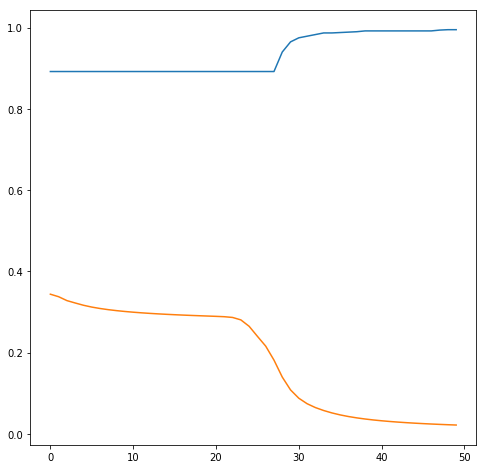

In [14]:
plt.plot(accies)
plt.plot(losses)

In [15]:
infered = sess.run(infered)

In [16]:
tlabels, infered

(array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0.]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))